## Importando bibliotecas

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Importando conjunto de dados

In [2]:
data = xr.open_dataset('nodc_5906017_prof.nc')
data

<xarray.Dataset>
Dimensions:                       (n_prof: 57, n_param: 3, n_levels: 511, n_calib: 1, n_history: 0)
Dimensions without coordinates: n_prof, n_param, n_levels, n_calib, n_history
Data variables: (12/65)
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    ...                            ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_history, n_prof) object ...
    crs                           int32 ...
Attributes: (12/49)
    title:                           Argo float vertical profile
    institution:                     FR GDAC
    source:                          Argo float
    history:                         2020-09-15T08:36:57Z boyer convAGDAC.f90...
    references:                      https://www.nodc.noaa.gov/argo/
    user_manual_version:             3.1
    ...                              ...
    time_coverage_end:               2020-09-13T22:38:46Z
    time_coverage_duration:          point
    time_coverage_resolution:        point
    gadr_ConventionVersion:          GADR-3.0
    gadr_program:                    convAGDAC.f90
    gadr_programVersion:             1.2

**Plot rápido das séries temporais dos perfis de temperatura**

Text(0, 0.5, 'Profundidade')

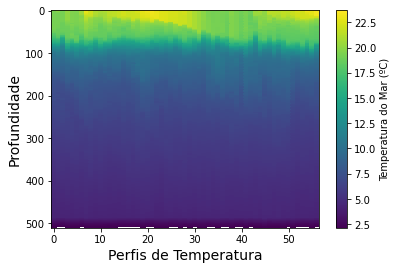

In [4]:
im = data.temp_adjusted.T.plot(cbar_kwargs={'label':'Temperatura do Mar (ºC)'})
plt.gca().invert_yaxis()
plt.xlabel('Perfis de Temperatura', fontsize=14)
plt.ylabel('Profundidade', fontsize=14)

**Plotagem de perfil único**

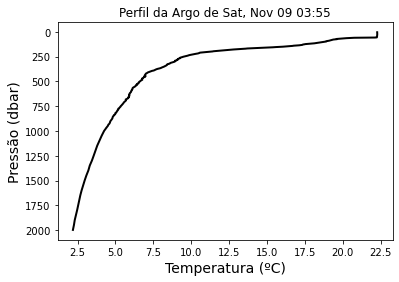

In [5]:
# Profile Plot
nprof = 25 #Specify a profile to plot
plt.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], c='black', lw=2)

plt.xlabel('Temperatura (ºC)', fontsize=14)
plt.ylabel('Pressão (dbar)', fontsize=14)
plt.title('Perfil da Argo de %s' % data.juld[nprof].dt.strftime('%a, %b %d %H:%M').values)

plt.gca().invert_yaxis() #Flip the y-axis

In [6]:
data.juld[nprof]

<xarray.DataArray 'juld' ()>
array('2019-11-09T03:55:33.000000000', dtype='datetime64[ns]')
Attributes:
    long_name:      Julian day (UTC) of the station relative to REFERENCE_DAT...
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     0.0
    axis:           T

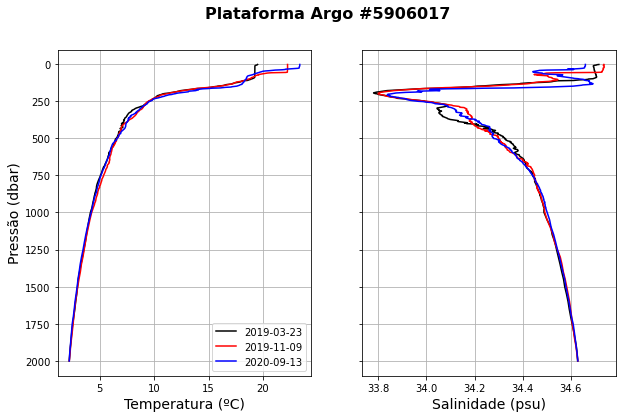

In [7]:
# Profile Plot
# Subplot example
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,6))

nprof = 0 # Fist profile
axes[0].plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], 
             label=data.juld[nprof].dt.strftime('%Y-%m-%d').values, c='black')
axes[1].plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof], c='black')

nprof = 25 # Middle-ish profile
axes[0].plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], 
             label=data.juld[nprof].dt.strftime('%Y-%m-%d').values, c='red')
axes[1].plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof], c='red')

nprof = -1 # Last profile
axes[0].plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], 
             label=data.juld[nprof].dt.strftime('%Y-%m-%d').values, c='blue')
axes[1].plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof], c='blue')

axes[0].set_ylabel('Pressão (dbar)', fontsize=14)
axes[0].set_xlabel('Temperatura (ºC)', fontsize=14)
axes[1].set_xlabel('Salinidade (psu)', fontsize=14)
axes[0].invert_yaxis()
axes[0].legend()

# Add some gridlines
for ax in axes:
    ax.grid()
# Add a super title
fig.suptitle('Plataforma Argo #%d' % data.platform_number[nprof].values, fontweight='bold', fontsize=16);

### Diagrama TS

Text(0.5, 1.0, 'Plataforma Argo #5906017')

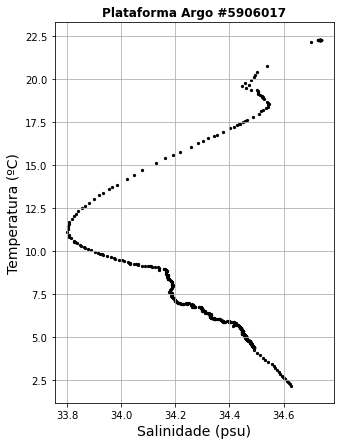

In [8]:
nprof = 25 #Selected profile
plt.figure(figsize=(5,7))
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c='black', s=5)
plt.xlabel('Salinidade (psu)', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.grid()

plt.title('Plataforma Argo #%d' % data.platform_number[nprof].values, fontweight='bold')

### Diagrama TS

Variando a profundidade

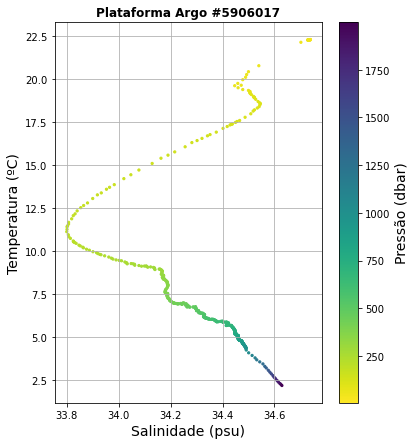

In [9]:
nprof = 25 #Selected profile
plt.figure(figsize=(6,7))
im = plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], s=5, 
            c=data.pres_adjusted[nprof], cmap='viridis_r')
cb = plt.colorbar(im)
cb.set_label('Pressão (dbar)', fontsize=14)
plt.xlabel('Salinidade (psu)', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.grid()

plt.title('Plataforma Argo #%d' % data.platform_number[nprof].values, fontweight='bold');

In [10]:
import seawater

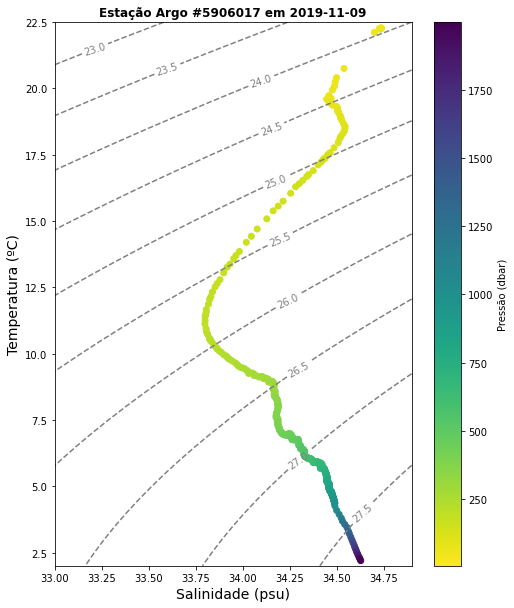

In [12]:
# TS Diagram with density contours
plt.figure(figsize=(8,10))

# Calculate the density lines
x = np.arange(33, 35, .1)
y = np.arange(2, 23, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinidade (psu)', fontsize=14);
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title('Estação Argo #%d em %s' % (data.platform_number[nprof].values, data.juld[nprof].dt.strftime('%Y-%m-%d').values), fontweight='bold');

# Add a colorbar
cbh = plt.colorbar(label='Pressão (dbar)');

## Mapas

In [13]:
import cartopy.crs as ccrs # cartographic coordinate reference system
import cartopy.feature as cfeature # features such as land, borders, coastlines

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

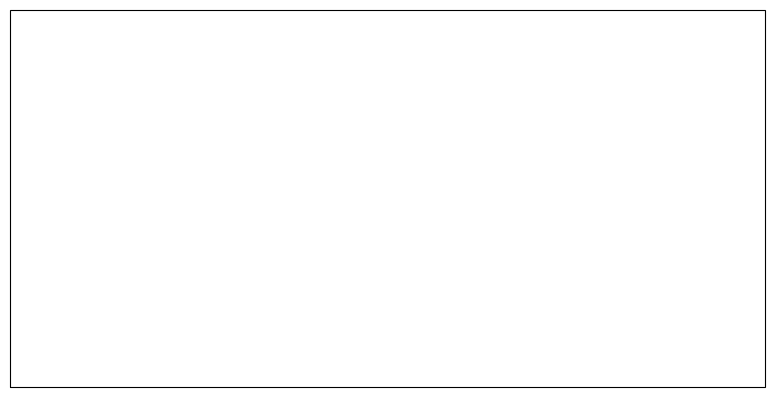

In [14]:
plt.figure(figsize=(15,5), dpi = 100) # open a new figure window and set the resolution
ax = plt.axes(projection = ccrs.PlateCarree()) #ccrs.Robinson()

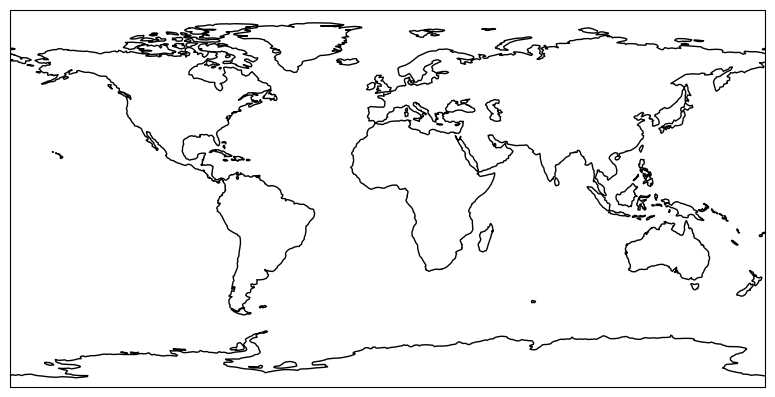

In [15]:
plt.figure(figsize=(15,5), dpi = 100) # open a new figure window and set the resolution
ax = plt.axes(projection = ccrs.PlateCarree()) #ccrs.Robinson()
ax.coastlines() # use the default low-resolution coastline

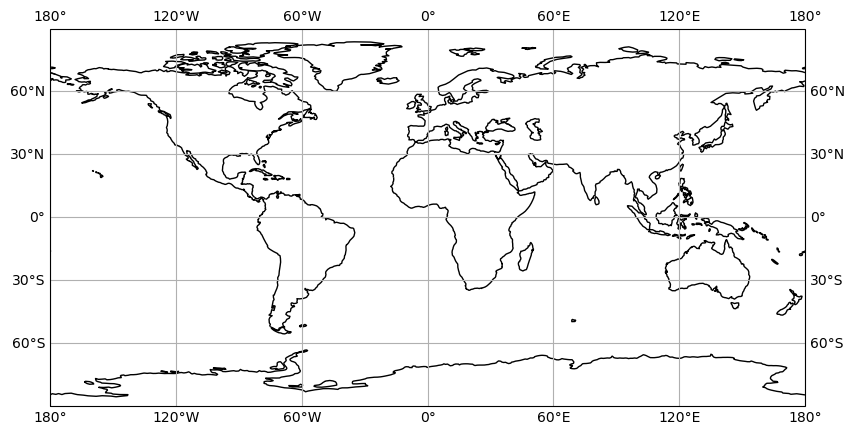

In [16]:
plt.figure(figsize=(15,5), dpi = 100) # open a new figure window and set the resolution
ax = plt.axes(projection = ccrs.PlateCarree()) #ccrs.Robinson()
ax.coastlines() # use the default low-resolution coastline
gl = ax.gridlines(draw_labels = True) # label all axes

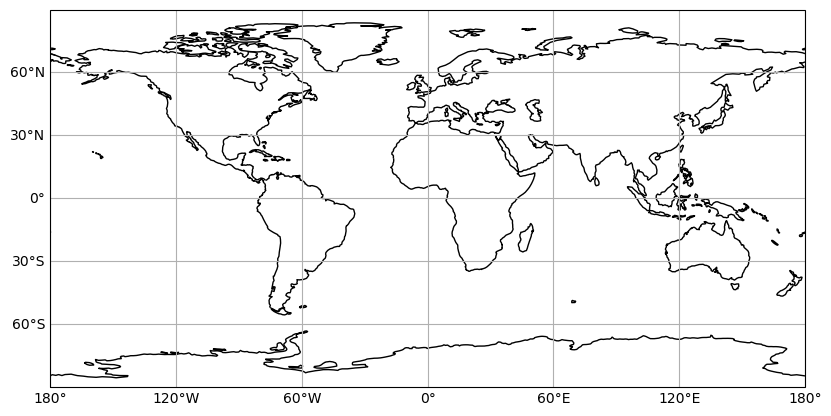

In [17]:
plt.figure(figsize=(15,5), dpi = 100) # open a new figure window and set the resolution
ax = plt.axes(projection = ccrs.PlateCarree()) #ccrs.Robinson()
ax.coastlines() # use the default low-resolution coastline
gl = ax.gridlines(draw_labels = True) # label all axes
gl.top_labels = False # turn off top label
gl.right_labels = False # turn off right label

In [18]:
var_name = 'tas' # air temperature at surface
file_in = 'sresa1b_ncar_ccsm3-example.nc'

In [19]:
# Open the file as an xarray Dataset and display the metadata
ds = xr.open_dataset(file_in)
# Select DataArray from variable
da = ds[var_name]

In [20]:
da

<xarray.DataArray 'tas' (time: 1, lat: 128, lon: 256)>
array([[[215.8935 , 215.80531, ..., 216.0347 , 215.95389],
        [217.16779, 217.03038, ..., 217.46663, 217.30852],
        ...,
        [265.04895, 265.09186, ..., 264.97314, 265.00818],
        [265.45532, 265.48535, ..., 265.40567, 265.42947]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) object 2000-05-16 12:00:00
Attributes:
    comment:         Created using NCL code CCSM_atmm_2cf.ncl on\n machine ea...
    cell_methods:    time: mean (interval: 1 month)
    history:         Added height coordinate
    coordinates:     height
    original_units:  K
    original_name:   TREFHT
    standard_name:   air_temperature
    units:           K
    long_name:       air_temperature
    cell_method:     time: mean

Text(0.5, 1.0, 'Temperatura do Ar na Superfície')

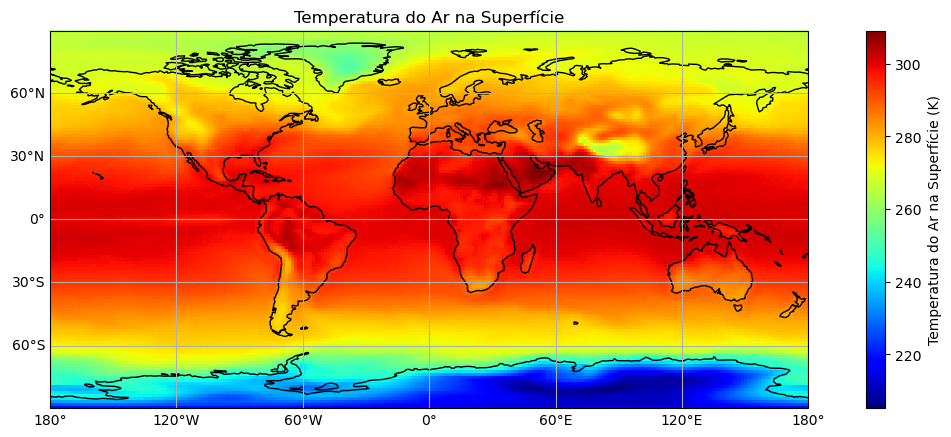

In [21]:
plt.figure(figsize=(15,5), dpi = 100) # open a new figure window and set the resolution
ax = plt.axes(projection = ccrs.PlateCarree()) #ccrs.Robinson()
ax.coastlines() # use the default low-resolution coastline

gl = ax.gridlines(draw_labels = True) # label all axes
gl.top_labels = False # turn off top label
gl.right_labels = False # turn off right label
im = da.plot(x ='lon', y = 'lat',
        cmap = 'jet', vmin = da.min(), vmax = da.max(),
        transform = ccrs.PlateCarree(), cbar_kwargs={'shrink': 1, 'label':'Temperatura do Ar na Superfície (K)'})

# cax = plt.colorbar(im, ax=ax, orientation='vertical', extend='max')
# cax.set_label('Temperatura do ar [K]', fontsize=14)

plt.title('Temperatura do Ar na Superfície')

Text(0.5, 1.0, 'Temperatura do Ar na Superfície')

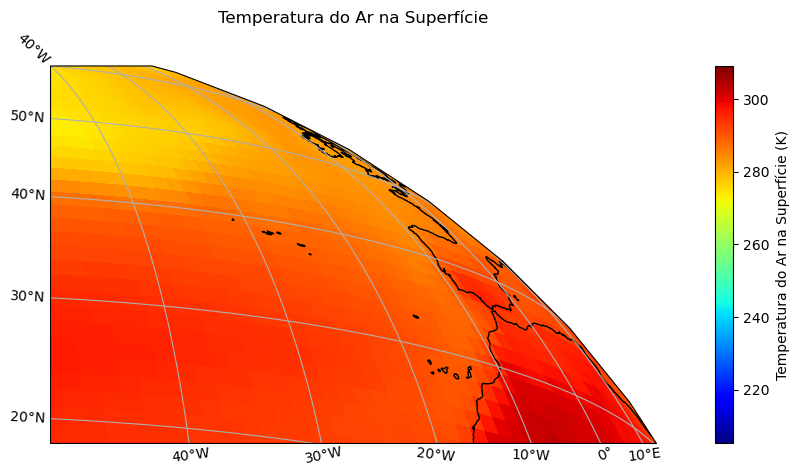

In [22]:
central_lon, central_lat = -60, -15
extent = [-40, 20, 30, 60]

plt.figure(figsize=(15,5), dpi = 100) # open a new figure window and set the resolution
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat)) #ccrs.Robinson()
ax.set_extent(extent)
ax.coastlines() # use the default low-resolution coastline

gl = ax.gridlines(draw_labels = True) # label all axes
gl.top_labels = False # turn off top label
gl.right_labels = False # turn off right label
im = da.plot(x ='lon', y = 'lat',
        cmap = 'jet', vmin = da.min(), vmax = da.max(),
        transform = ccrs.PlateCarree(), cbar_kwargs={'shrink': 1, 'label':'Temperatura do Ar na Superfície (K)'})

# cax = plt.colorbar(im, ax=ax, orientation='vertical', extend='max')
# cax.set_label('Temperatura do ar [K]', fontsize=14)

plt.title('Temperatura do Ar na Superfície')

In [23]:
ds = xr.open_dataset(r'data.nc', decode_times=False)

In [24]:
ds

<xarray.Dataset>
Dimensions:  (X: 180, T: 2010, zlev: 1, Y: 89)
Coordinates:
  * X        (X) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * T        (T) float32 -1.272e+03 -1.27e+03 -1.27e+03 ... 735.5 736.5 737.5
  * zlev     (zlev) float32 0.0
  * Y        (Y) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
Data variables:
    sst      (T, zlev, Y, X) float32 ...

Text(0.5, 1.0, 'Temperatura da Superfície do Mar')

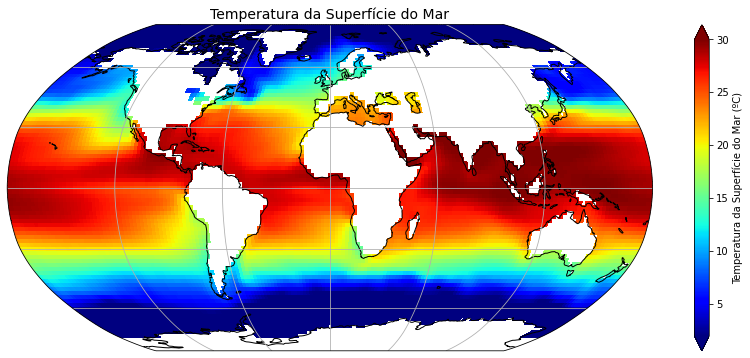

In [25]:
sst = ds.sst.sel(T=737.5, method='nearest')
fig = plt.figure(figsize=(15,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 1, 'label':'Temperatura da Superfície do Mar (ºC)'}, cmap='jet')
plt.title('Temperatura da Superfície do Mar', fontsize=14)